In [1]:
%matplotlib inline
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# For the purposes of this tutorial, we just know the MAST URL location of the file we want to examine.
fits_file = "https://archive.stsci.edu/missions/tess/tid/s0001/0000/0000/2515/5310/tess2018206045859-s0001-0000000025155310-0120-s_tp.fits"

In [ ]:
fits.info(fits_file)

Filename: /root/.astropy/cache/download/url/ec0e845560e8e75754a996e0a58d2177/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  PIXELS        1 BinTableHDU    248   20076R x 11C   [D, E, J, 121J, 121E, 121E, 121E, 121E, J, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   
  3  TARGET COSMIC RAY    1 BinTableHDU     27   0R x 4C   [J, I, I, E]   


In [ ]:
fits.getdata(fits_file, ext=1).columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'RAW_CNTS'; format = '121J'; unit = 'count'; null = -1; disp = 'I8'; dim = '(11,11)'
    name = 'FLUX'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'FLUX_ERR'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'FLUX_BKG'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'FLUX_BKG_ERR'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'POS_CORR1'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'POS_CORR2'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
)

In [ ]:
with fits.open(fits_file, mode="readonly") as hdulist:
    tess_bjds = hdulist[1].data['TIME']
    raw_counts = hdulist[1].data['RAW_CNTS']
    calibrated_fluxes = hdulist[1].data['FLUX']

In [ ]:
print(type(calibrated_fluxes))
print(calibrated_fluxes.shape)

<class 'numpy.ndarray'>
(20076, 11, 11)


In [ ]:
calibrated_fluxes[4,:,:].shape

(11, 11)

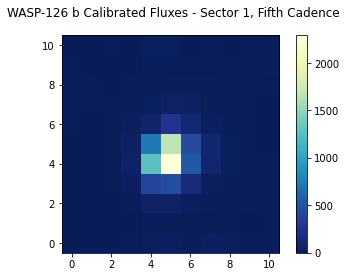

In [ ]:
# Start figure and axis.
fig, ax = plt.subplots()

# Display the calibrated fluxes as an image for the fifth cadence.
cax = ax.imshow(calibrated_fluxes[4,:,:], cmap=plt.cm.YlGnBu_r, origin="lower")

# Let's define a title for the figure.
fig.suptitle("WASP-126 b Calibrated Fluxes - Sector 1, Fifth Cadence")

# Add a color bar.
cbar = fig.colorbar(cax)
plt.show()

In [ ]:
with fits.open(fits_file, mode="readonly") as hdulist:
    aperture = hdulist[2].data

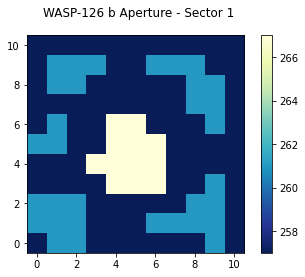

In [ ]:
# Start figure and axis.
fig, ax = plt.subplots()

# Display the pixels as an image.
cax = ax.imshow(aperture, cmap=plt.cm.YlGnBu_r, origin="lower")

# Add a color bar.
cbar = fig.colorbar(cax)

# Add a title to the plot.
fig.suptitle("WASP-126 b Aperture - Sector 1")
plt.show()

In [ ]:
# Break down a pixel value of 267 (yellow pixels displayed above) into its constituent bits.
bits = np.binary_repr(267)
print(bits)

100001011


In [ ]:

# Create an array that will keep track of which pixels have a bitmask
# value of 2 set. To start, everything is set to 0 = not set.  We make it
# the same dimension as the aperture pixel table, for clarity.
bitmask2_set = np.zeros(aperture.shape)

# Identify which pixels have the bit mask value of 2 set.  We'll first
# loop over each row (i) in the 11x11 table, and then each column (j).
for i,row in enumerate(aperture):
    for j, pix in enumerate(row):

        # Get the bitmask as a string of zeros and ones.
        this_bitmask = np.binary_repr(pix)

        # Is the bitmask value of 2 set?  If so, the 2nd integer from the
        # right should be set to 1.  We'll use Python negative indexes to
        # access the second integer from the right.
        if this_bitmask[-2] == '1':
            
            # Then record this pixel as having a bitmask value of 2 set.
            bitmask2_set[i,j] = 1

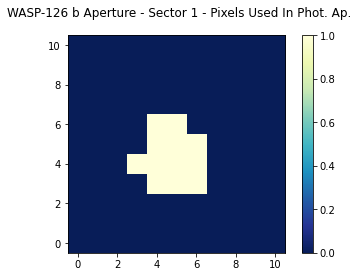

In [ ]:
# Start figure and axis.
fig, ax = plt.subplots()

# Display, as an image, the 11x11 table that records the bitmask value of 2 being set.
cax = ax.imshow(bitmask2_set, cmap=plt.cm.YlGnBu_r, origin="lower")

# Add a color bar.
cbar = fig.colorbar(cax)

# Add a title to the plot.
fig.suptitle("WASP-126 b Aperture - Sector 1 - Pixels Used In Phot. Ap.")
plt.show()